# Regularization

Regularization is a technique used in machine learning to prevent overfitting and improve the generalization ability of models. When a model is overfitting, it has learned the training data too well and may not perform well on new, unseen data. Regularization introduces additional constraints or penalties to the model during the training process, controlling the complexity of the model and avoiding over-reliance on specific features.

Common regularization methods include **L1 (Lasso)**, **L2 (Ridge)**, and **Elastic Net** regularization.

# L1 Regularization (Lasso)

**L1 regularization**, also called Lasso (Least Absolute Shrinkage and Selection Operator), adds the absolute value of the sum of coefficients as a penalty term to the loss function. The penalty term is computed as:
$$\lambda \sum |w_i|$$

Where $w_i$ represents the individual coefficients and $\lambda$ is the regularization parameter

# L2 Regularization (Ridge)

**L2 regularization**, also called Ridge regression, adds the squared sum of coefficients as the penalty term to the loss function. The penalty term is computed as:
$$\lambda \sum w_i^2$$

Where $w_i$ represents the individual coefficients and $\lambda$ is the regularization parameter

# What this means in practice?

Despite similar formulas, the way these penalties work leads to very different behaviors

**Lasso** adds a penalty based on the absolute values of coefficients, which can shrink some coefficients exactly to zero, effectively performing feature selection and producing sparse, more interpretable models. It is somewhat less effective with multicollinearity (when two or more features in a dataset are highly correlated, making it hard for the model to understand which one really matters) but more robust to outliers.

In contrast, **Ridge** penalizes the squared coefficients, shrinking them towards zero without setting them exactly to zero. This results in dense models where all features remain, better handling multicollinearity but offering less interpretability and being less robust to outliers.

**L2** handles multicollinearity better because it shares the importance between similar features instead of choosing just one. **L1** picks only one feature and ignores the others, which can lose useful information and make the model unstable.

If there are many features and some of them might be irrelevant or the dataset is simply too high-dimensional, **Lasso** might be a better choice.

# Elastic Net Regularization

**Elastic Net regularization** is a technique that combines the strengths of both L1 and L2 regularization methods. It's particularly effective for high-dimensional data and problems with multicollinearity, offering a balanced approach that addresses the limitations of using either L1 or L2 alone.
The penalty term for Elastic Net is computed as:
$$
\lambda_1 \sum_i |w_i| + \lambda_2 \sum_i w_i^2
$$
**Where:**
- $w_i$ represents the individual coefficients
- $\lambda_1$ is the L1 regularization parameter (controlling sparsity)
- $\lambda_2$ is the L2 regularization parameter (controlling shrinkage)

**Alternative formula (using a single regularization parameter $\lambda$):**
$$\lambda \left[ \alpha \sum_i |w_i| + (1 - \alpha) \sum_i w_i^2 \right]$$
**Where:**
- $\lambda$ controls the overall strength of regularization
- $\alpha$ determines the balance between L1 and L2 penalties ($0 \leq \alpha \leq 1$)
- When $\alpha = 1$, it becomes pure L1 regularization (Lasso)
- When $\alpha = 0$, it becomes pure L2 regularization (Ridge)

# Example

**Import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Data generation**

In [2]:
# Generate synthetic data
np.random.seed(0)
X_signal = np.random.randn(100, 1) * 5
true_coef = np.array([2.5])
y = X_signal.dot(true_coef) + np.random.randn(100) * 2

# Add noise features (10 irrelevant predictors)
X_noise = np.random.randn(100, 10)
X = np.hstack([X_signal, X_noise])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Dataset shape:", X.shape)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Dataset shape: (100, 11)
Training set shape: (70, 11)
Test set shape: (30, 11)


**Model Definitions**

In [3]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge (L2)': Ridge(alpha=1.0),
    'Lasso (L1)': Lasso(alpha=0.1),
    'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

# Train models and collect results
coefs, errors = {}, {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    coefs[name] = model.coef_
    errors[name] = mean_squared_error(y_test, y_pred)
    print(f"{name} fitted successfully")

Linear Regression fitted successfully
Ridge (L2) fitted successfully
Lasso (L1) fitted successfully
Elastic Net fitted successfully


**Coefficients comparison**

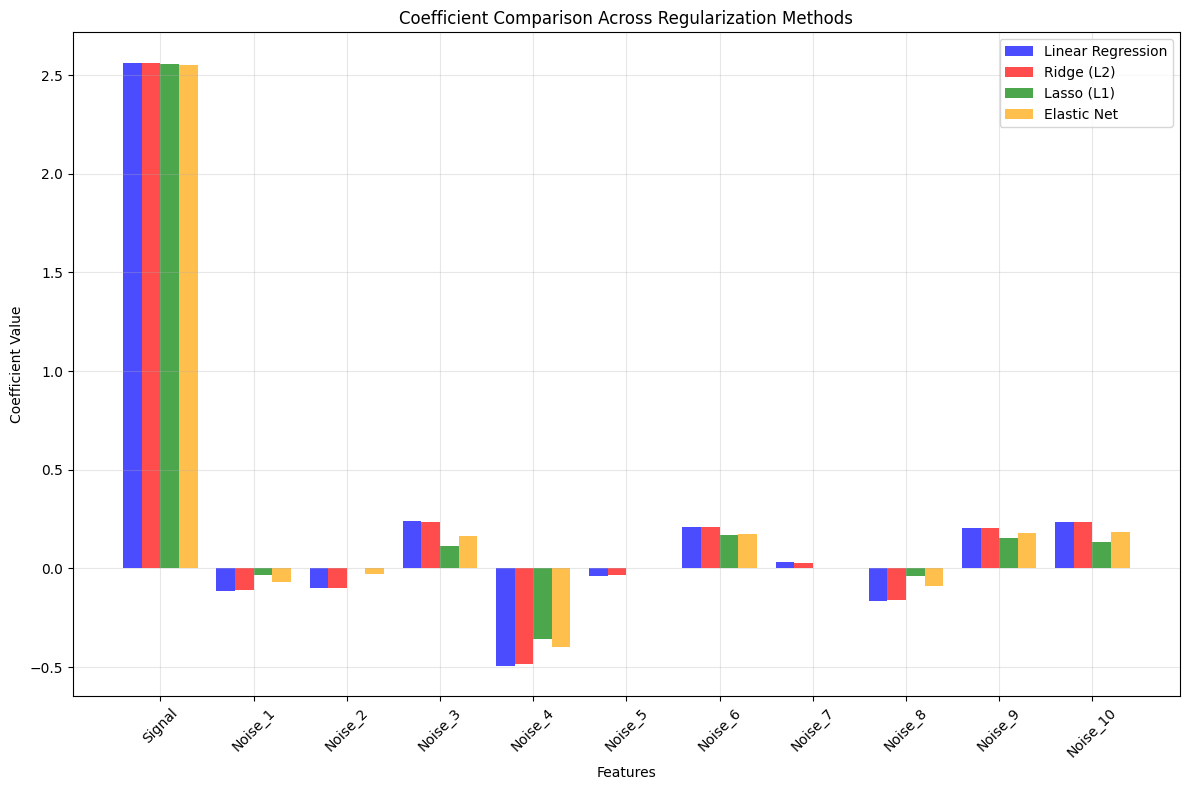

In [4]:
# Plot coefficients comparison
fig, ax = plt.subplots(figsize=(12, 8))

# Feature names
feature_names = ['Signal'] + [f'Noise_{i}' for i in range(1, 11)]
x_pos = np.arange(len(feature_names))

# Plot coefficients for each model
width = 0.2
colors = ['blue', 'red', 'green', 'orange']

for i, (name, color) in enumerate(zip(models.keys(), colors)):
    offset = (i - 1.5) * width
    ax.bar(x_pos + offset, coefs[name], width, label=name, color=color, alpha=0.7)

ax.set_xlabel('Features')
ax.set_ylabel('Coefficient Value')
ax.set_title('Coefficient Comparison Across Regularization Methods')
ax.set_xticks(x_pos)
ax.set_xticklabels(feature_names, rotation=45)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [5]:
# Print prediction errors
print("\nMean Squared Errors:")
print("-" * 30)
for name, err in errors.items():
    print(f"{name}: {err:.4f}")


Mean Squared Errors:
------------------------------
Linear Regression: 3.3859
Ridge (L2): 3.3670
Lasso (L1): 3.1221
Elastic Net: 3.1836


In [6]:
# Show regularization effects
print("\nRegularization Effects Analysis:")
print("-" * 40)

# Count non-zero coefficients
for name, coef in coefs.items():
    non_zero = np.sum(np.abs(coef) > 1e-6)
    print(f"{name}: {non_zero} non-zero coefficients")

# Show coefficient magnitudes
print("\nCoefficient L2 norms:")
for name, coef in coefs.items():
    l2_norm = np.linalg.norm(coef)
    print(f"{name}: {l2_norm:.4f}")


Regularization Effects Analysis:
----------------------------------------
Linear Regression: 11 non-zero coefficients
Ridge (L2): 11 non-zero coefficients
Lasso (L1): 8 non-zero coefficients
Elastic Net: 9 non-zero coefficients

Coefficient L2 norms:
Linear Regression: 2.6586
Ridge (L2): 2.6535
Lasso (L1): 2.5955
Elastic Net: 2.6087
